In [1]:
import numpy as np; import matplotlib.pyplot as plt; import pandas as pd; import seaborn as sns
sns.set_theme(font_scale=2)
import pyarma as pa

In [3]:
def csvToDf(filename):
    """ returns a pandas dataframe  

    Args:
        filename (_string_): csv-file with energy and magnetization for each cycle
    """
    df = pd.read_csv(filename)
    T = df.temperature.to_numpy()[0]
    L = df.gridsize.to_numpy()[0]
    energy = df.energy
    mag = df.magnetization
    cycles = np.arange(0, len(energy))
    temperature = np.zeros(len(energy))
    temperature[:] = T
    gridsize = np.zeros(len(energy))
    gridsize[:] = L
    energy1mom = np.cumsum(energy)/(cycles + 1)
    energy2mom = np.cumsum(energy**2)/(cycles + 1)
    heatCapacity = 1/(L**2*T**T)*(energy2mom - energy1mom**2)
    mag1mom = np.cumsum(abs(mag))/(cycles + 1)
    mag2mom = np.cumsum(mag**2)/(cycles + 1)
    susceptibility = 1/(L**2*T)*(mag2mom - mag1mom**2)
    df['energy1mom'] = energy1mom
    df['energy2mom'] = energy2mom
    df['magnetization1mom'] = mag1mom
    df['magnetization2mom'] = mag2mom
    df['heatCapacity'] = heatCapacity
    df['susceptibility'] = susceptibility
    df['temperature'] = temperature
    df['gridsize'] = gridsize
    
    return df

    

## Problem 4

In [4]:
df = csvToDf('output/validation2x2.csv')
df

,energy,magnetization,temperature,gridsize,energy1mom,energy2mom,magnetization1mom,magnetization2mom,heatCapacity,susceptibility
0,0,2,1.0,2.0,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000
1,-8,4,1.0,2.0,-4.000000,32.000000,3.000000,10.000000,4.000000,0.250000
2,-8,4,1.0,2.0,-5.333333,42.666667,3.333333,12.000000,3.555556,0.222222
3,-8,4,1.0,2.0,-6.000000,48.000000,3.500000,13.000000,3.000000,0.187500
4,-8,4,1.0,2.0,-6.400000,51.200000,3.600000,13.600000,2.560000,0.160000
...,...,...,...,...,...,...,...,...,...,...
999996,-8,-4,1.0,2.0,-7.984608,63.876864,3.994788,15.974184,0.030725,0.003963
999997,-8,-4,1.0,2.0,-7.984608,63.876864,3.994788,15.974184,0.030725,0.003963
999998,-8,-4,1.0,2.0,-7.984608,63.876864,3.994788,15.974184,0.030725,0.003963
999999,-8,-4,1.0,2.0,-7.984608,63.876864,3.994788,15.974184,0.030725,0.003963


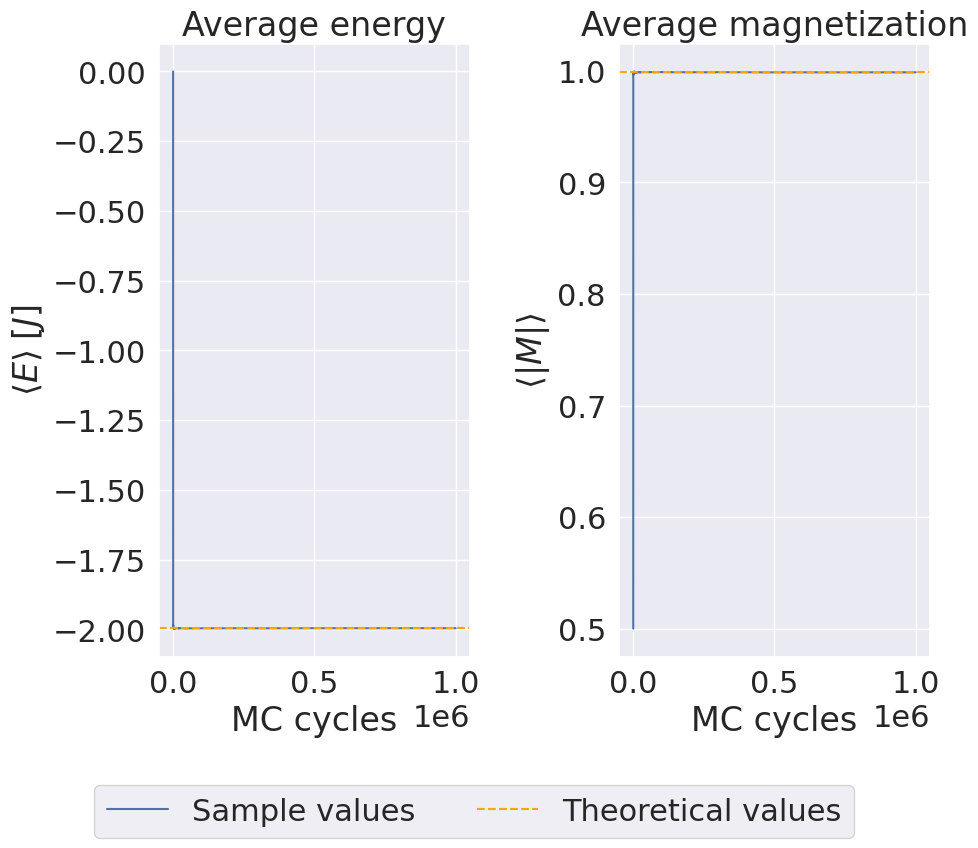

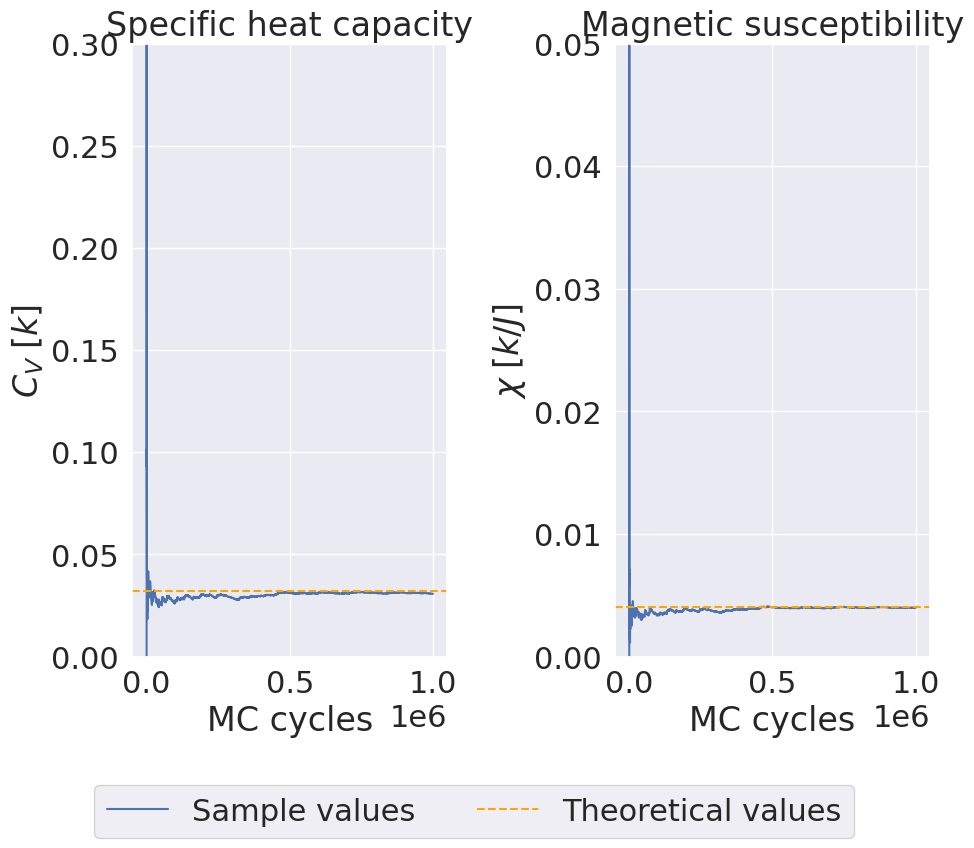

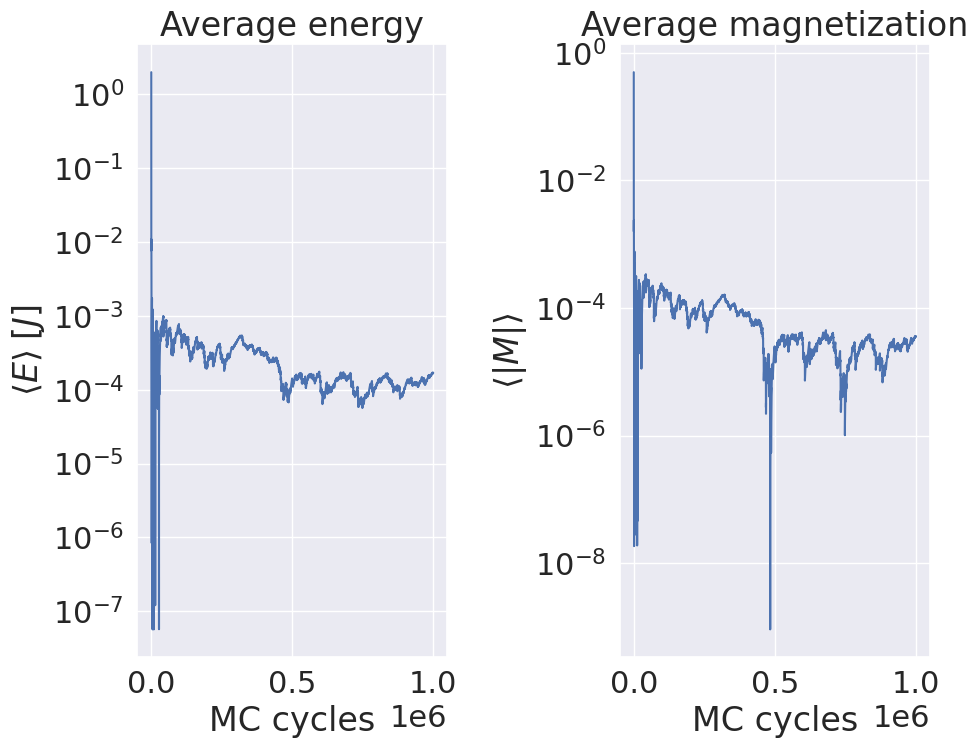

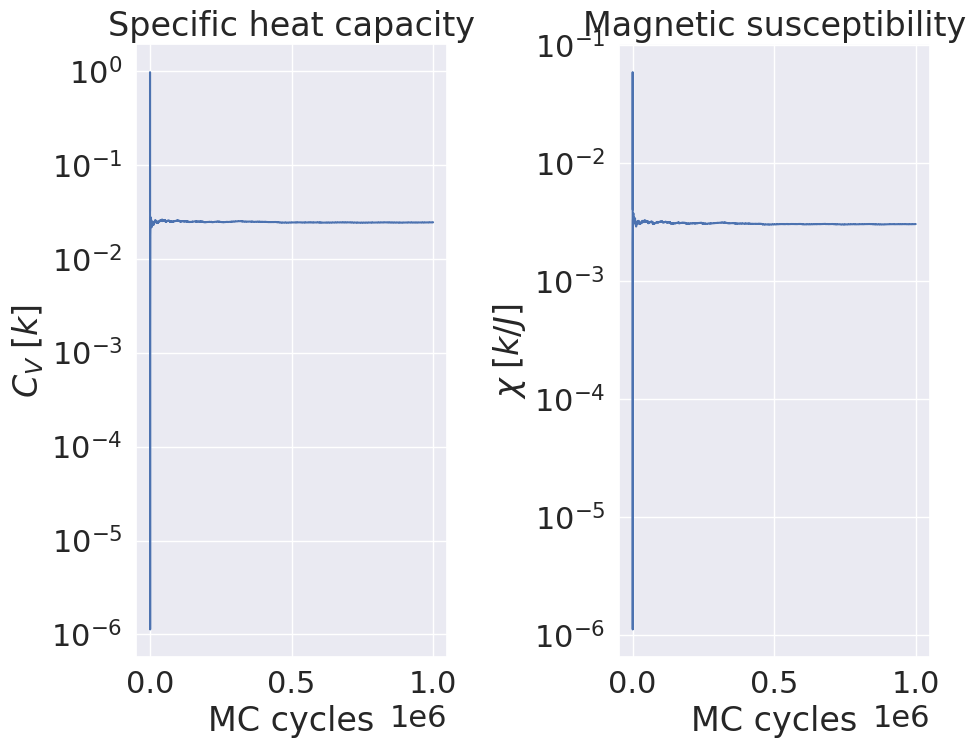

In [6]:
validation2x2 = csvToDf('output/validation2x2.csv')
T = np.mean(validation2x2.temperature)
L = validation2x2.gridsize[0]
beta = 1/T
Z = 12 + + 4*np.cosh(8*beta)
avgEng = -8*np.sinh(8*beta)/Z
engMom2 = 32*np.cosh(8*beta)/Z
avgM = (4 + 2*np.exp(8*beta))/Z
mMom2 = (8 + 8*np.exp(8*beta))/Z
cV = 64/(T**2)*(1/Z*np.cosh(8*beta) - 4/Z**2*np.sinh(8*beta)**2)
chi = 8*beta*((1 + np.exp(8*beta))/Z - 2*(2 + np.exp(8*beta))**2/Z**2 )


cycles = np.arange(0, len(validation2x2))
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.energy1mom/(L**2), label = 'Sample values')
axs[0].axhline(avgEng, linestyle = '--', label = 'Theoretical values', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].plot(cycles, validation2x2.magnetization1mom/(L**2))
axs[1].axhline(avgM, linestyle = '--', color = 'orange')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].plot(cycles, validation2x2.heatCapacity)
axs[0].axhline(cV, linestyle = '--', color = 'orange')
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_ylim([0, 0.3])
axs[0].set_title('Specific heat capacity')

axs[1].plot(cycles, validation2x2.susceptibility, label = 'Sample values')
axs[1].axhline(chi, linestyle = '--', color = 'orange', label = 'Theoretical values')
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')
axs[1].set_ylim([0, 0.05])
lgd = fig.legend(loc = 'lower center', ncol = 2, fancybox = True, 
        bbox_to_anchor = (0.5, -0.1))
axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.energy1mom/(L**2) - avgEng))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$\langle E \rangle\; [J]$')
axs[0].set_title('Average energy')


axs[1].semilogy(cycles, abs(validation2x2.magnetization1mom/(L**2) - avgM))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\langle |M| \rangle$')
axs[1].set_title('Average magnetization')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].semilogy(cycles, abs(validation2x2.heatCapacity/(L**2) - cV))
axs[0].set_xlabel('MC cycles')
axs[0].set_ylabel(r'$C_V\; [k]$')
axs[0].set_title('Specific heat capacity')

axs[1].semilogy(cycles, abs(validation2x2.susceptibility/(L**2) - chi))
axs[1].set_xlabel('MC cycles')
axs[1].set_ylabel(r'$\chi\; [k/J]$')
axs[1].set_title('Magnetic susceptibility')

axs[0].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs[1].ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig.tight_layout()
plt.show()



## Problem 5

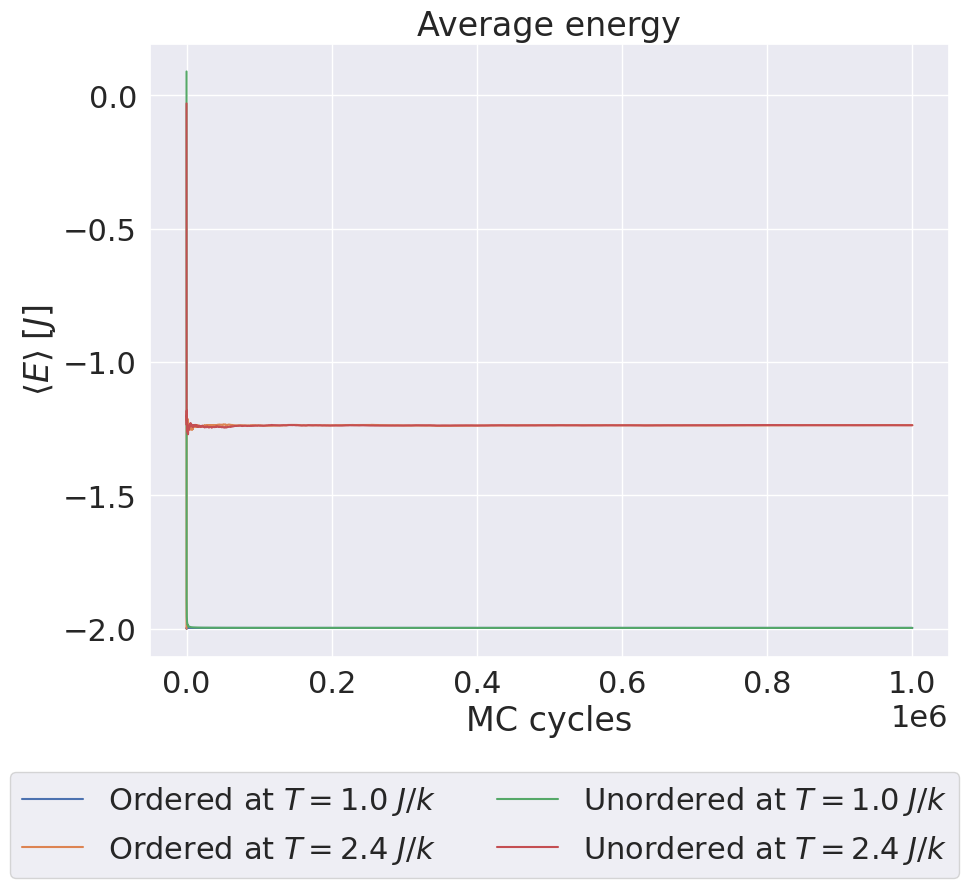

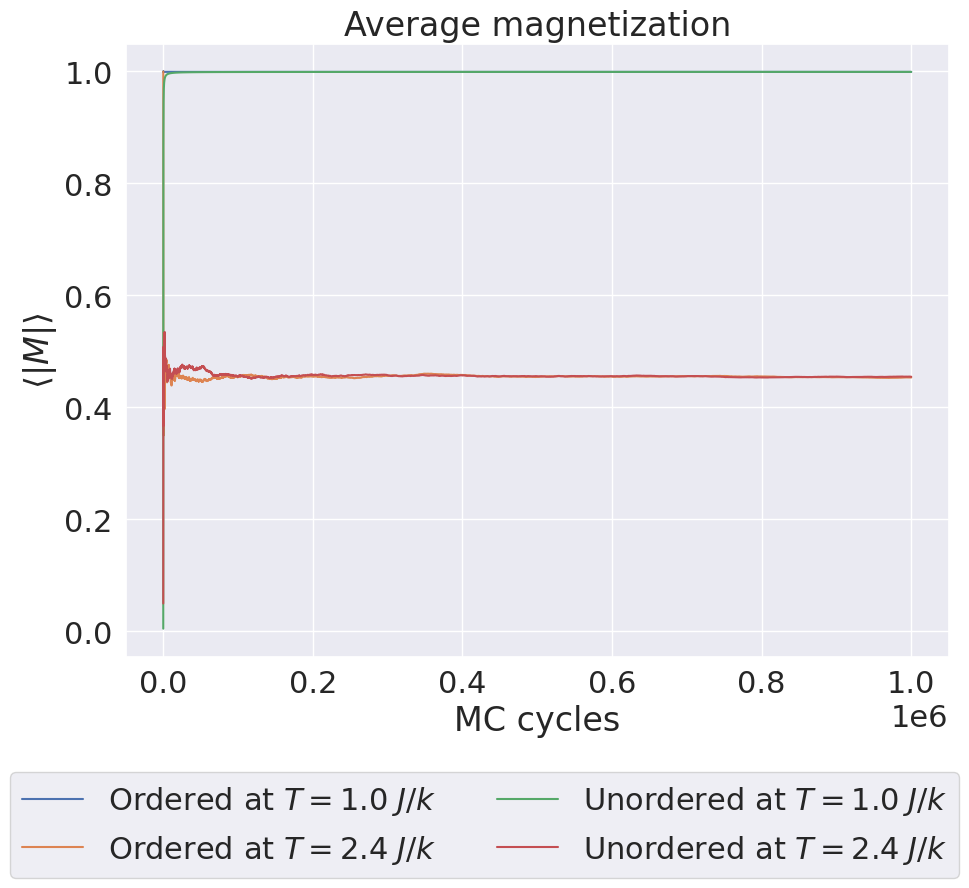

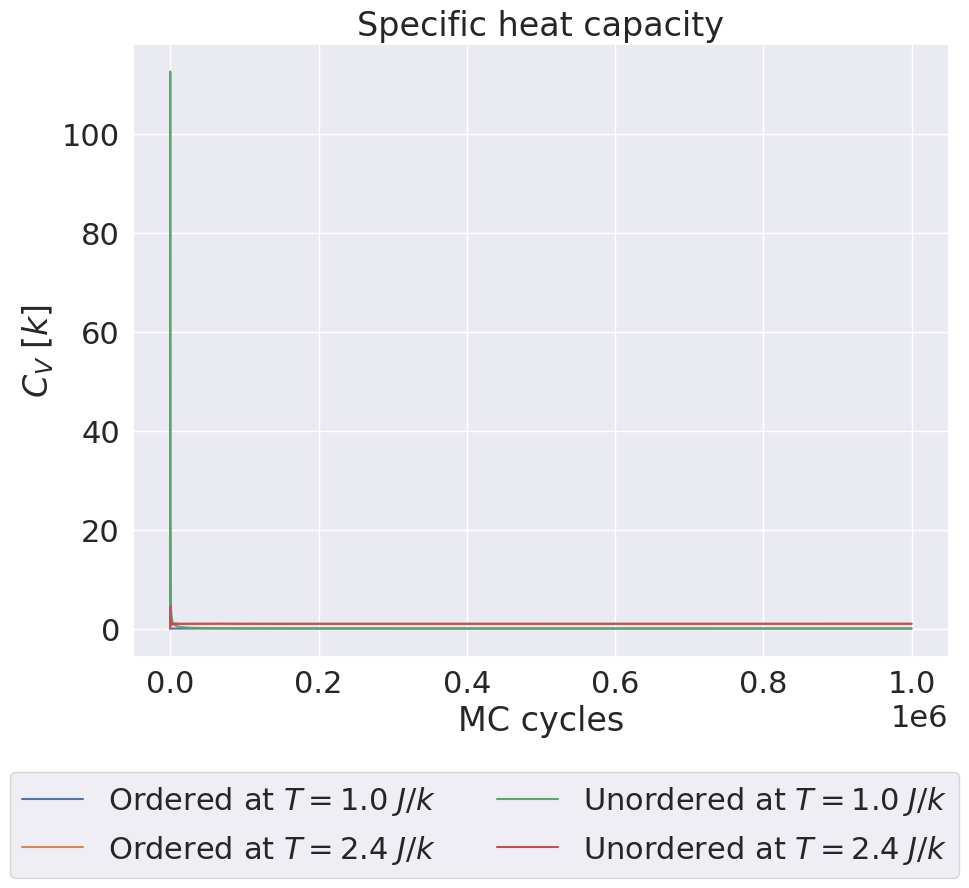

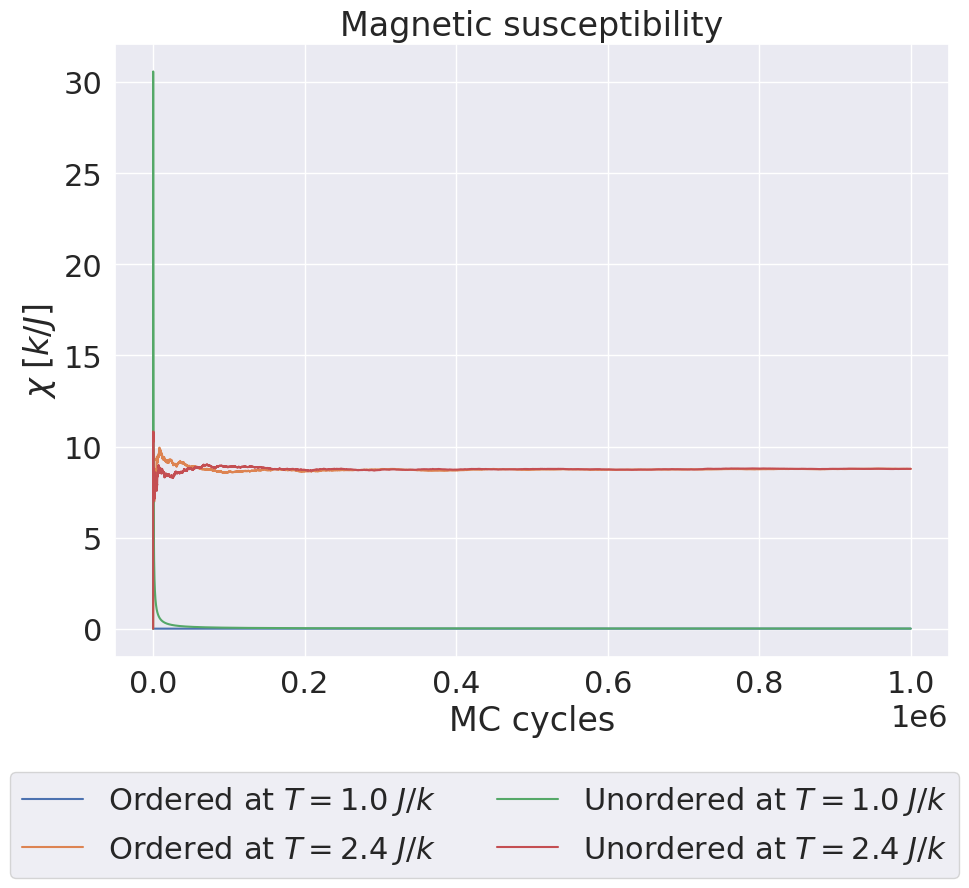

In [7]:
fig1, axs1 = plt.subplots(1, 1, figsize = (10, 8))
fig2, axs2 = plt.subplots(1, 1, figsize = (10, 8))
fig3, axs3 = plt.subplots(1, 1, figsize = (10, 8))
fig4, axs4 = plt.subplots(1, 1, figsize = (10, 8))
filenames = ['output/ordered1.csv', 'output/ordered2.csv', 'output/unordered1.csv', 'output/unordered2.csv']
names = [r'Ordered at $T = 1.0\; J/k$', r'Ordered at $T = 2.4\; J/k$', r'Unordered at $T = 1.0\; J/k$', r'Unordered at $T = 2.4\; J/k$']
for filename, name in zip(filenames, names):
    df = csvToDf(filename)
    cycles = np.arange(0, len(df))
    L = df.gridsize[0]
    
    axs1.plot(cycles, df.energy1mom/L**2, label = name)
    axs1.set_xlabel('MC cycles')
    axs1.set_ylabel(r'$\langle E \rangle\; [J]$')
    axs1.set_title('Average energy')
    
    axs2.plot(cycles, df.magnetization1mom/L**2, label = name)
    axs2.set_xlabel('MC cycles')
    axs2.set_ylabel(r'$\langle |M| \rangle$')
    axs2.set_title('Average magnetization')
    
    axs3.plot(cycles, df.heatCapacity, label = name)
    axs3.set_xlabel('MC cycles')
    axs3.set_ylabel(r'$C_V\; [k]$')
    axs3.set_title('Specific heat capacity')
    
    axs4.plot(cycles, df.susceptibility, label = name)
    axs4.set_xlabel('MC cycles')
    axs4.set_ylabel(r'$\chi\; [k/J]$')
    axs4.set_title('Magnetic susceptibility')
    
lgd = fig1.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig2.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig3.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
lgd = fig4.legend(loc = 'lower center', ncol = 2, fancybox = True, 
            bbox_to_anchor = (0.5, -0.15))
axs1.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs2.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs3.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))
axs4.ticklabel_format(style = 'sci', axis = 'x', scilimits = (0,0))

fig1.tight_layout()
fig2.tight_layout()
fig3.tight_layout()
fig4.tight_layout()
plt.show()


## Problem 6

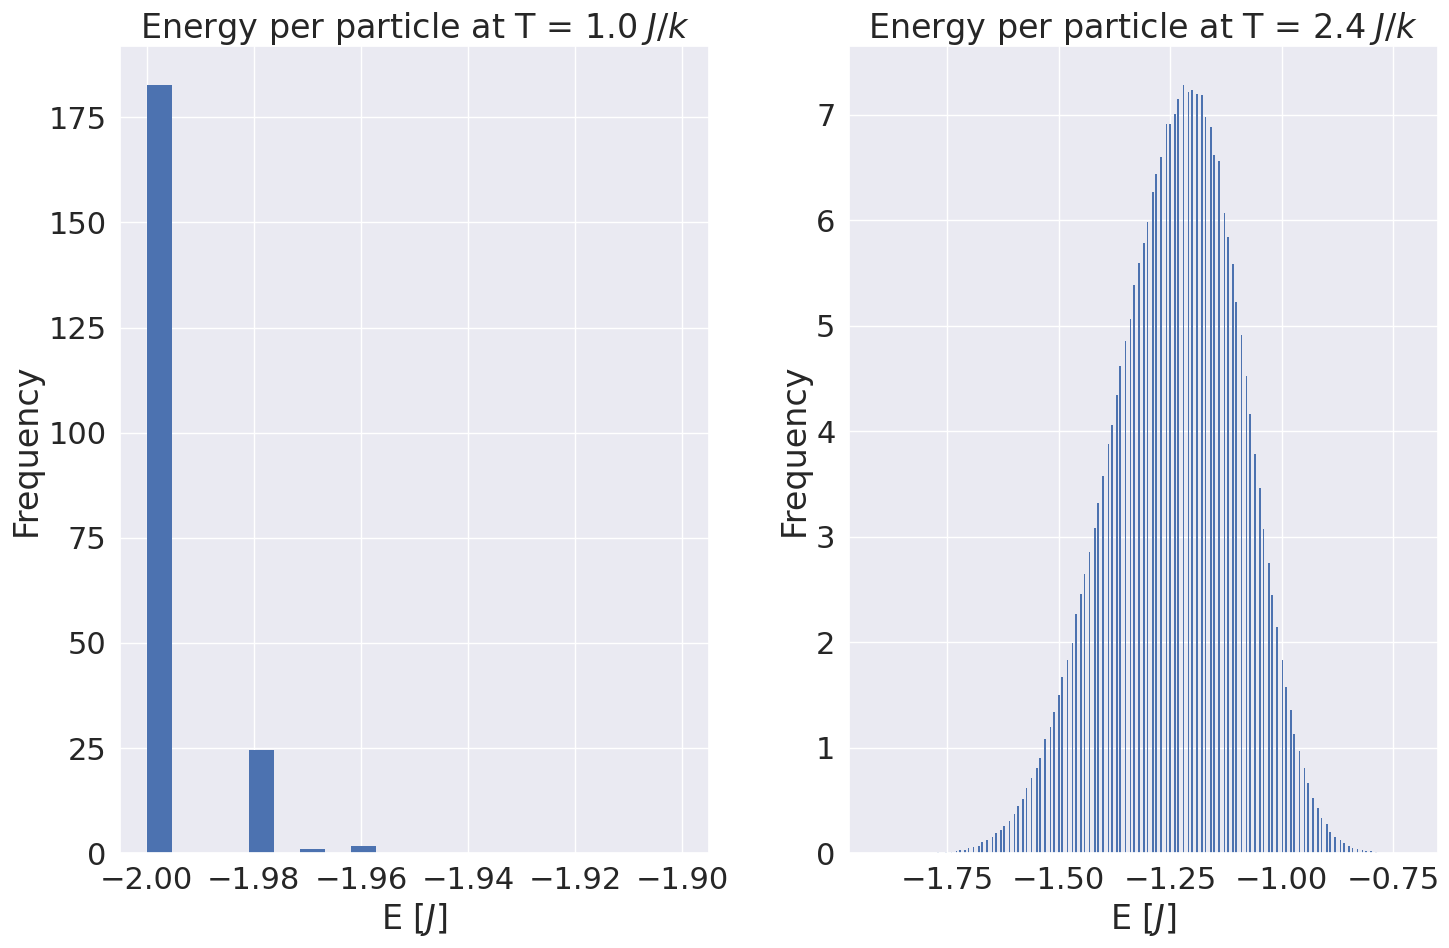

In [8]:
df1 = csvToDf('output/unordered1.csv') # At T = 1.0
df2 = csvToDf('output/unordered2.csv') # At T = 2.4
burnInindex = int(0.02*len(df1))
energy1 = df1.energy[burnInindex:]/df1.gridsize[0]**2
energy2 = df2.energy[burnInindex:]/df2.gridsize[0]**2
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
axs[0].hist(energy1, bins = 'auto', density = True, edgecolor = 'None')
axs[1].hist(energy2, bins = 'auto', density = True, edgecolor = 'None')
axs[0].set_xlabel(r'E $[J]$')
axs[1].set_xlabel(r'E $[J]$')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[0].set_title(r'Energy per particle at T = $1.0\; J/k$')
axs[1].set_title(r'Energy per particle at T = $2.4\; J/k$')
fig.tight_layout()
plt.show()

### More histograms for L = 20 at different temperatures

ParserError: Error tokenizing data. C error: Expected 4 fields in line 5023, saw 7


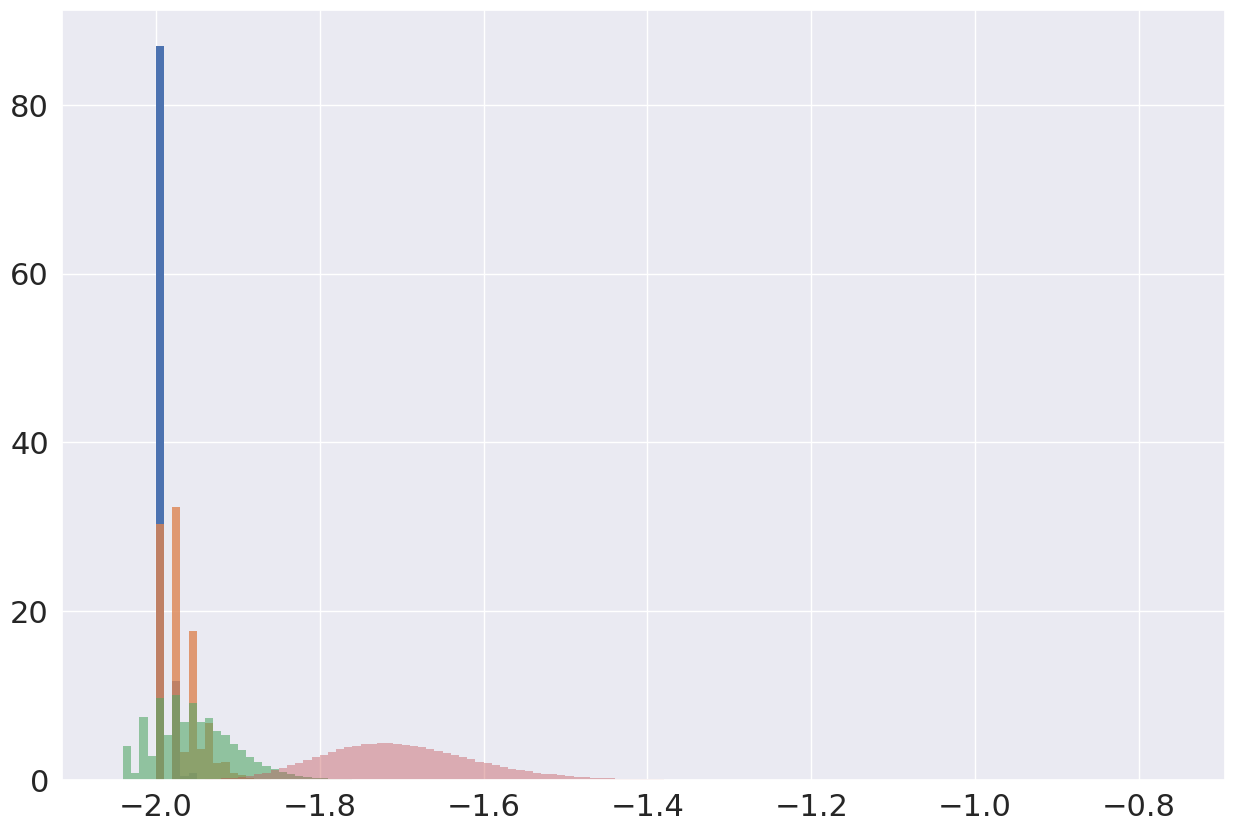

In [9]:
files40 = [f"output/L=20_{i}.csv" for i in range(5)]
fig, axs = plt.subplots(1, 1, figsize = (15, 10))
for index, files in enumerate(files40):
    df = csvToDf(files) 
    T = df.temperature[0]
    burnInindex = int(0.02*len(df))
    energy = df.energy[burnInindex:]/df.gridsize[0]**2
    axs.hist(energy, bins = np.arange(-2.05, -0.75, 0.01), alpha = 1 - index/5, density = True, edgecolor = 'None', label = f'T = {T} $J/k$', align = 'mid')
axs.set_yscale('log')
axs.set_xlabel(r'E $[J]$')
axs.set_ylabel('Logarithmic normalized frequency')
axs.set_title(r'Histograms of energy per particle for gridsize $L = 20$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.show()

### Problem 7

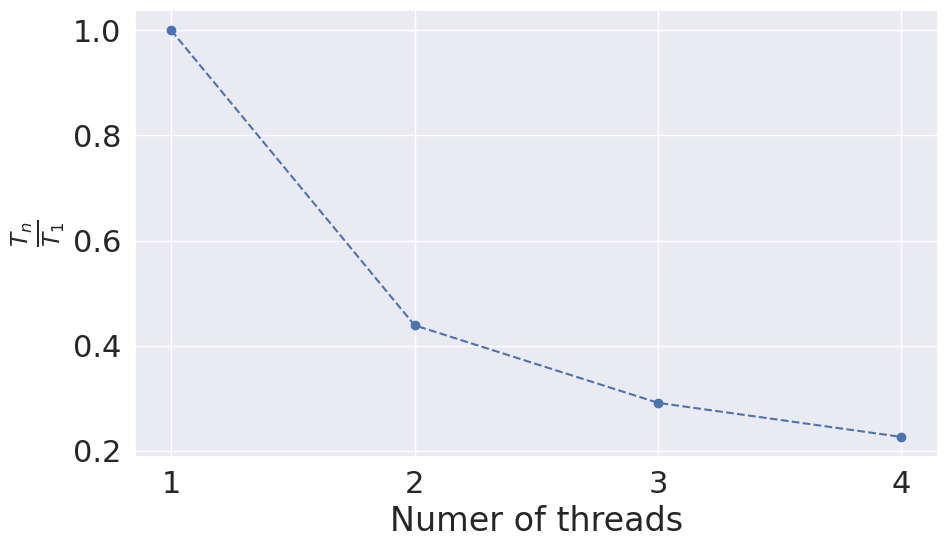

[1. 2. 3. 4.]


In [50]:
timing = np.loadtxt('problem7.txt')
num = timing[:, 0]
time = timing[:, 1]
frac = time/time[0]
fig, axs = plt.subplots(1, 1, figsize = (10, 6))
axs.scatter(num, frac)
axs.plot(num, frac, linestyle = '--')
axs.set_xlabel('Numer of threads')
axs.set_xticks(num)
axs.set_ylabel(r'$\frac{T_n}{T_1}$')
fig.tight_layout()
fig,
plt.show()
print(num)


### Problem 8

L = 40

In [120]:
files40 = [f"output/L=40_{i}.csv" for i in range(10)]
eng40 = np.zeros(len(files40))
mag40 = np.zeros(len(files40))
cv40 = np.zeros(len(files40))
chi40 = np.zeros(len(files40))
temp = np.zeros(len(files40))
for index, files in enumerate(files40):
    df = csvToDf(files)
    eng40[index] = df.energy[int(0.2*1e6):].mean()/df.gridsize[0]**2
    eng2 = np.mean(df.energy[int(0.2*1e6):]**2)/df.gridsize[0]**4
    mag40[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
    mag2 = np.mean(df.magnetization[int(0.2*1e6):]**2)/df.gridsize[0]**4
    cv40[index] = 1/(df.gridsize[0]**2*T**T)*(eng2 - eng40[index]**2)
    chi40[index] = 1/(df.gridsize[0]**2*T)*(mag2 - mag40[index]**2)
    temp[index] = df.temperature[0] 

files60 = [f"output/L=60_{i}.csv" for i in range(10)]
eng60 = np.zeros(len(files60))
mag60 = np.zeros(len(files60))
cv60 = np.zeros(len(files60))
chi60 = np.zeros(len(files60))
temp = np.zeros(len(files60))
for index, files in enumerate(files60):
    df = csvToDf(files)
    eng60[index] = df.energy[int(0.2*1e6):].mean()/df.gridsize[0]**2
    eng2 = np.mean(df.energy[int(0.2*1e6):]**2)/df.gridsize[0]**4
    mag60[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
    mag2 = np.mean(df.magnetization[int(0.2*1e6):]**2)/df.gridsize[0]**4
    cv60[index] = 1/(df.gridsize[0]**2*T**T)*(eng2 - eng60[index]**2)
    chi60[index] = 1/(df.gridsize[0]**2*T)*(mag2 - mag60[index]**2)
    temp[index] = df.temperature[0] 

files80 = [f"output/L=80_{i}.csv" for i in range(10)]
eng80 = np.zeros(len(files80))
mag80 = np.zeros(len(files80))
cv80 = np.zeros(len(files80))
chi80 = np.zeros(len(files80))
for index, files in enumerate(files80):
    df = csvToDf(files)
    eng80[index] = df.energy[int(0.2*1e6):].mean()/df.gridsize[0]**2
    eng2 = np.mean(df.energy[int(0.2*1e6):]**2)/df.gridsize[0]**4
    mag80[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
    mag2 = np.mean(df.magnetization[int(0.2*1e6):]**2)/df.gridsize[0]**4
    cv80[index] = 1/(df.gridsize[0]**2*T**T)*(eng2 - eng80[index]**2)
    chi80[index] = 1/(df.gridsize[0]**2*T)*(mag2 - mag80[index]**2)

files100 = [f"output/L=100_{i}.csv" for i in range(10)]
eng100 = np.zeros(len(files100))
mag100 = np.zeros(len(files100))
cv100 = np.zeros(len(files100))
chi100 = np.zeros(len(files100))
for index, files in enumerate(files100):
    df = csvToDf(files)
    eng100[index] = df.energy[int(0.2*1e6):].mean()/df.gridsize[0]**2
    eng2 = np.mean(df.energy[int(0.2*1e6):]**2)/df.gridsize[0]**4
    mag100[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
    mag2 = np.mean(df.magnetization[int(0.2*1e6):]**2)/df.gridsize[0]**4
    cv100[index] = 1/(df.gridsize[0]**2*T**T)*(eng2 - eng100[index]**2)
    chi100[index] = 1/(df.gridsize[0]**2*T)*(mag2 - mag100[index]**2)


ParserError: Error tokenizing data. C error: Expected 4 fields in line 5, saw 22


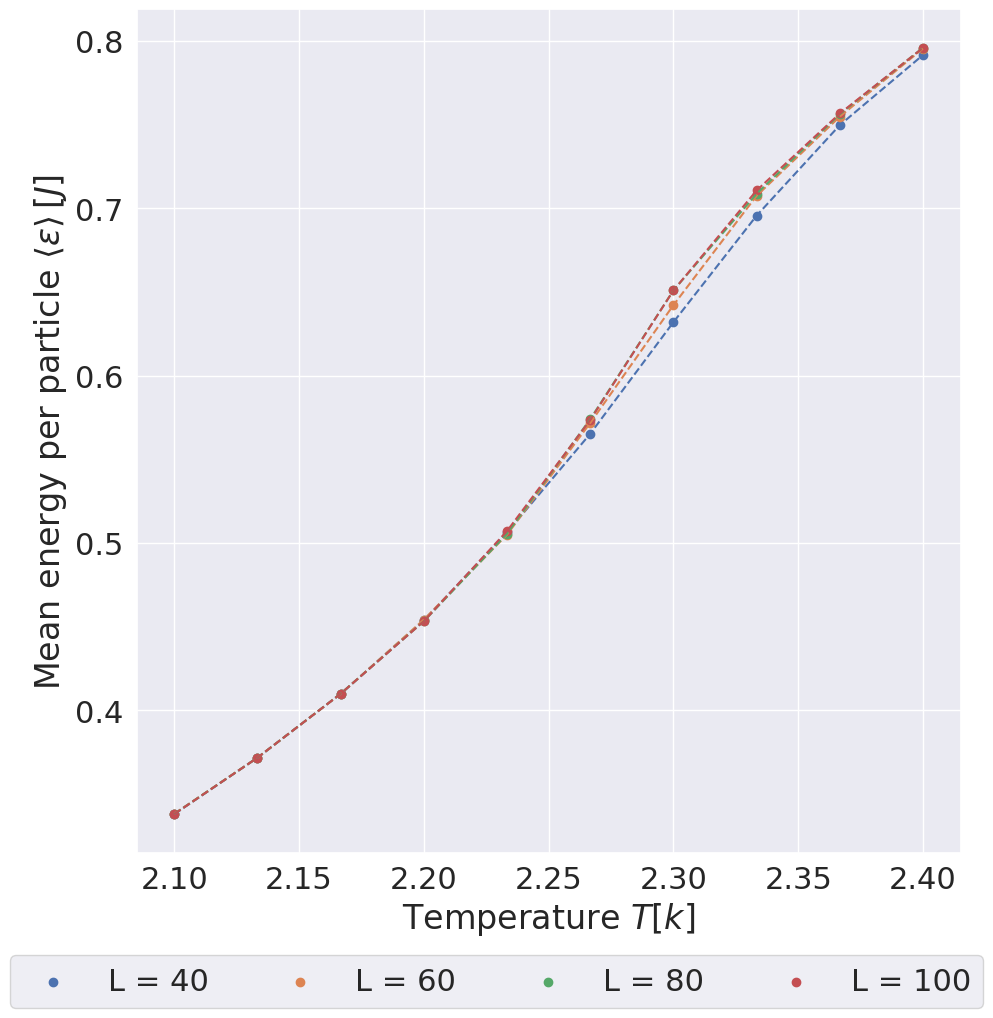

In [118]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.plot(temp, eng40, linestyle = '--')
axs.scatter(temp, eng40, label = f'L = 40')

axs.plot(temp, eng60, linestyle = '--')
axs.scatter(temp, eng60, label = f'L = 60')

axs.plot(temp, eng80, linestyle = '--')
axs.scatter(temp, eng80, label = f'L = 80')

axs.plot(temp, eng100, linestyle = '--')
axs.scatter(temp, eng100, label = f'L = 100')

axs.set_ylabel(r'Mean energy per particle $\langle\epsilon\rangle\, [J]$')
axs.set_xlabel(r'Temperature $T [k]$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.show()

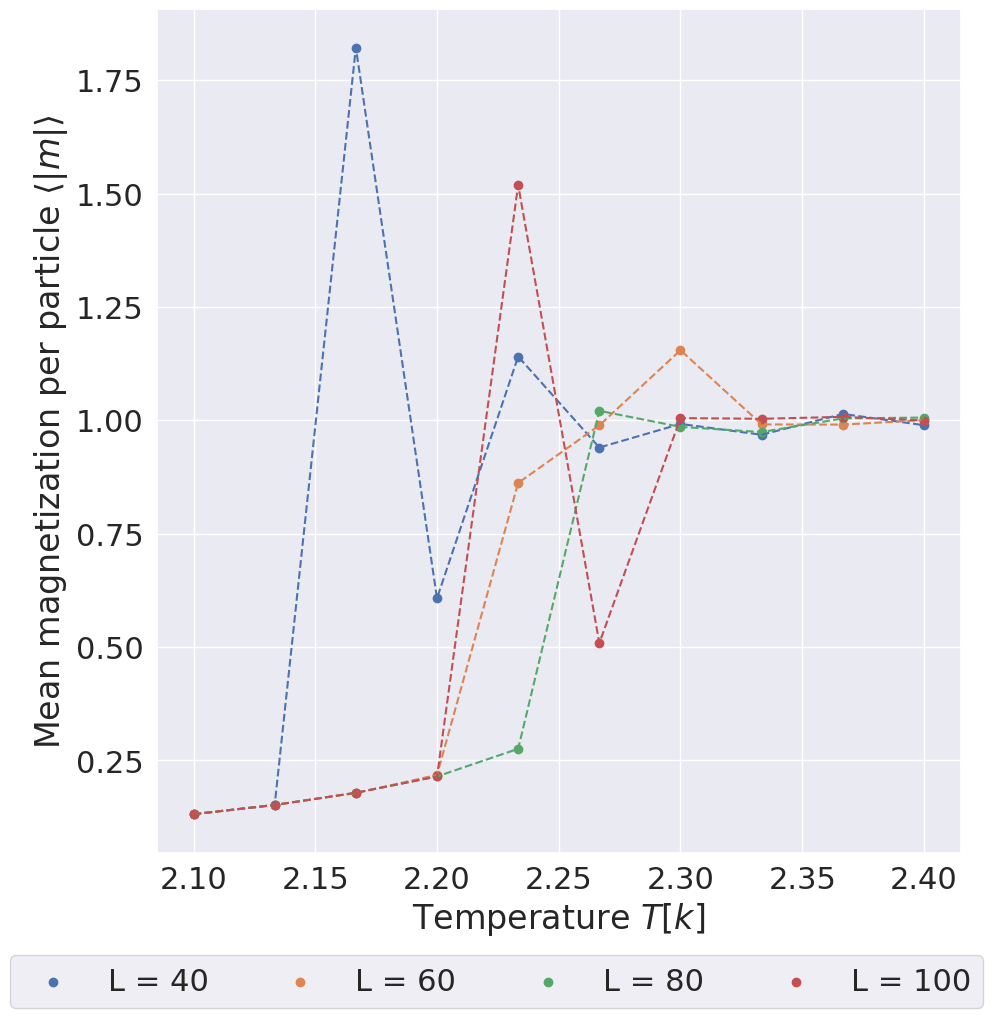

In [119]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.plot(temp, mag40, linestyle = '--')
axs.scatter(temp, mag40, label = f'L = 40')

axs.plot(temp, mag60, linestyle = '--')
axs.scatter(temp, mag60, label = f'L = 60')

axs.plot(temp, mag80, linestyle = '--')
axs.scatter(temp, mag80, label = f'L = 80')

axs.plot(temp, mag100, linestyle = '--')
axs.scatter(temp, mag100, label = f'L = 100')

axs.set_ylabel(r'Mean magnetization per particle $\langle|m|\rangle$')
axs.set_xlabel(r'Temperature $T [k]$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.show()

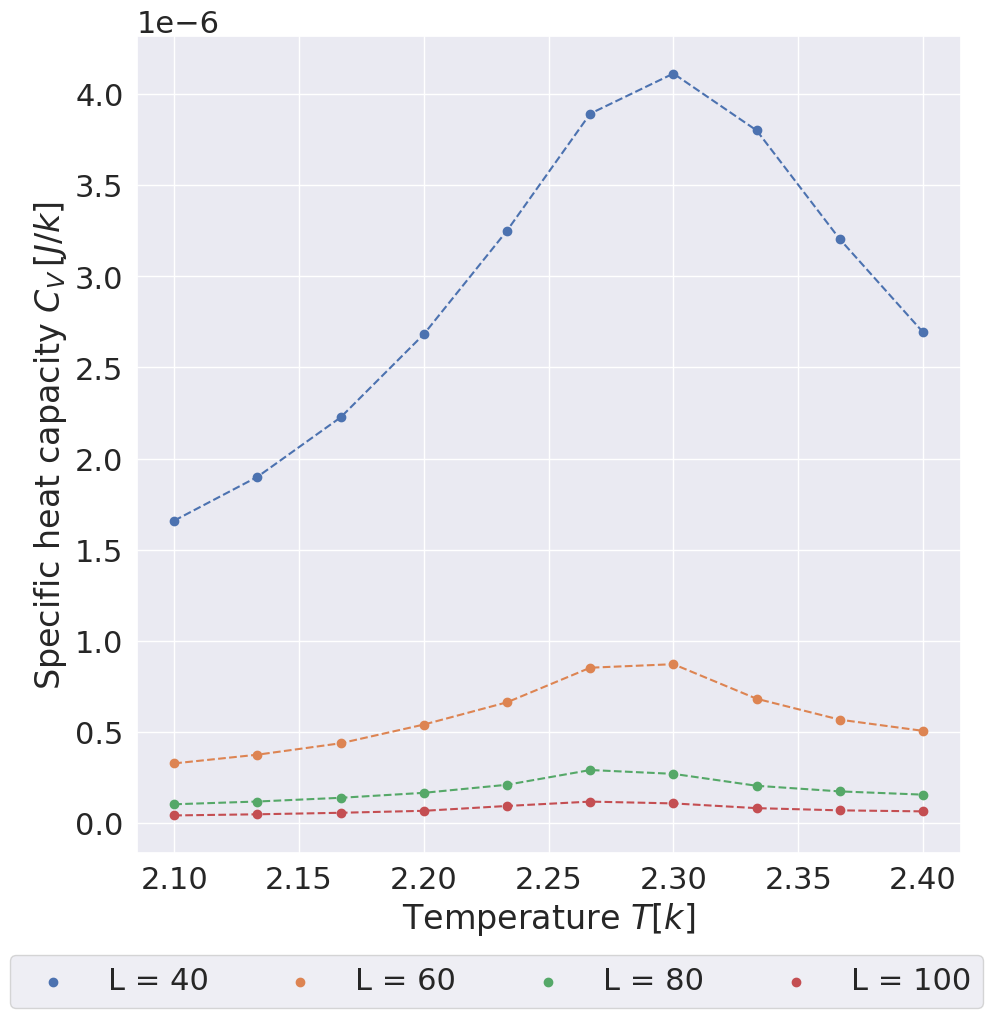

In [104]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.plot(temp, cv40, linestyle = '--')
axs.scatter(temp, cv40, label = f'L = 40')

axs.plot(temp, cv60, linestyle = '--')
axs.scatter(temp, cv60, label = f'L = 60')

axs.plot(temp, cv80, linestyle = '--')
axs.scatter(temp, cv80, label = f'L = 80')

axs.plot(temp, cv100, linestyle = '--')
axs.scatter(temp, cv100, label = f'L = 100')

axs.set_ylabel(r'Specific heat capacity $C_V\, [J/k]$')
axs.set_xlabel(r'Temperature $T [k]$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.show()

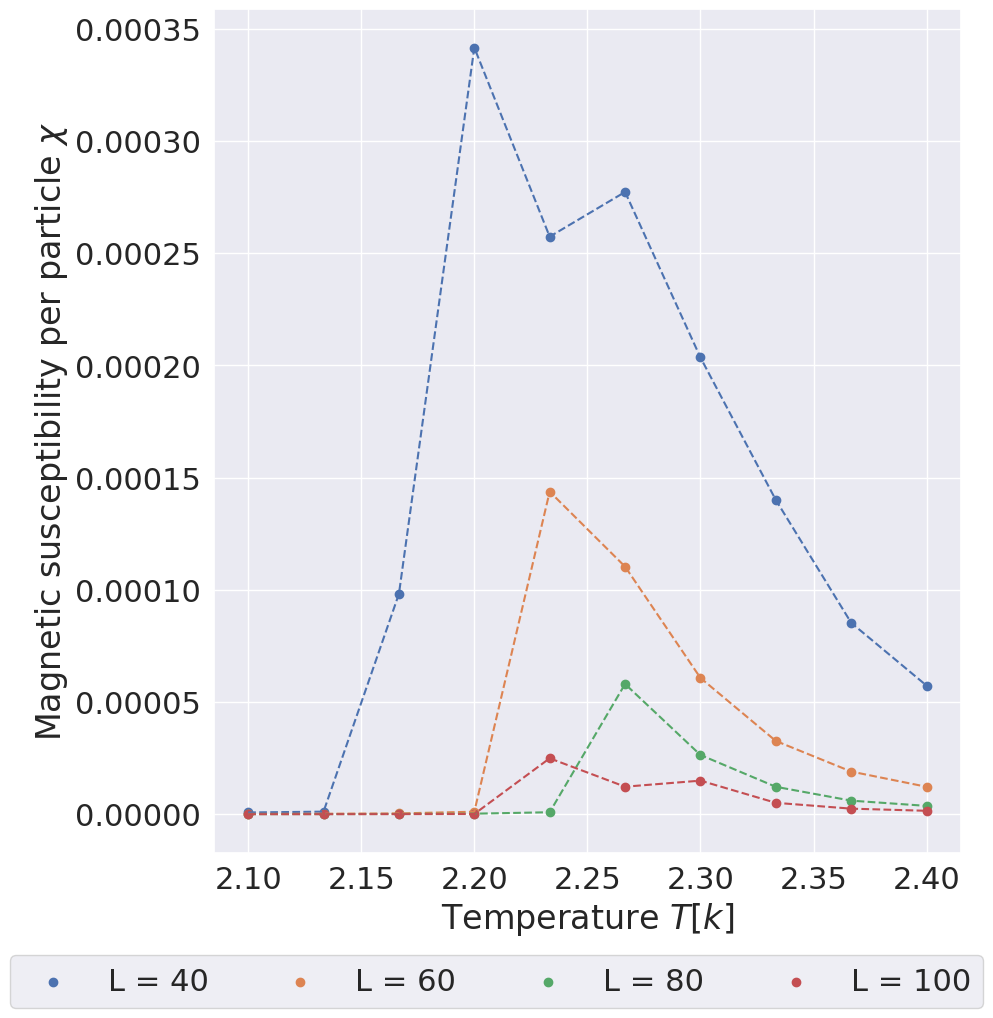

In [105]:
fig, axs = plt.subplots(1, 1, figsize = (10, 10))
axs.plot(temp, chi40, linestyle = '--')
axs.scatter(temp, chi40, label = f'L = 40')

axs.plot(temp, chi60, linestyle = '--')
axs.scatter(temp, chi60, label = f'L = 60')

axs.plot(temp, chi80, linestyle = '--')
axs.scatter(temp, chi80, label = f'L = 80')

axs.plot(temp, chi100, linestyle = '--')
axs.scatter(temp, chi100, label = f'L = 100')

axs.set_ylabel(r'Magnetic susceptibility per particle $\chi$')
axs.set_xlabel(r'Temperature $T [k]$')
lgd = fig.legend(loc = 'lower center', ncol = 5, fancybox = True, 
            bbox_to_anchor = (0.5, -0.05))
fig.tight_layout()
plt.show()

In [87]:
df = csvToDf('output/L=80_5.csv')
df.magnetization.min()

0

In [113]:
df

,energy,magnetization,temperature,gridsize,energy1mom,energy2mom,magnetization1mom,magnetization2mom,heatCapacity,susceptibility
0,0,0,2.4,100.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
1,1908,-546,2.4,100.0,954.000000,1.820232e+06,273.000000,1.490580e+05,11.132425,3.105375
2,3104,-952,2.4,100.0,1670.666667,4.425093e+06,499.333333,4.014733e+05,19.986470,6.339148
3,3584,-1154,2.4,100.0,2149.000000,6.530084e+06,663.000000,6.340340e+05,23.385913,8.102708
4,3928,-1352,2.4,100.0,2504.800000,8.309904e+06,800.800000,8.728080e+05,24.902641,9.646973
...,...,...,...,...,...,...,...,...,...,...
999996,8012,-7986,2.4,100.0,7958.924337,6.340967e+07,9987.523921,1.013202e+08,0.797441,65.398263
999997,7864,-8142,2.4,100.0,7958.924242,6.340967e+07,9987.522075,1.013202e+08,0.797441,65.398339
999998,7972,-8194,2.4,100.0,7958.924255,6.340967e+07,9987.520282,1.013201e+08,0.797440,65.398408
999999,7988,-8026,2.4,100.0,7958.924284,6.340967e+07,9987.518320,1.013201e+08,0.797439,65.398503


In [112]:
print(df.energy.min()/df.gridsize[0]**2)
print(df.energy.max()/df.gridsize[0]**2)
print(df.magnetization.min()/df.gridsize[0]**2)
print(df.magnetization.max()/df.gridsize[0]**2)

0.0
0.9332
-1.4874
0.0


In [116]:
mask = (df.magnetization == df.magnetization.min())

df[mask]

,energy,magnetization,temperature,gridsize,energy1mom,energy2mom,magnetization1mom,magnetization2mom,heatCapacity,susceptibility
678396,7380,-14874,2.4,100.0,7957.411097,6.338562e+07,10036.071336,1.023229e+08,0.797835,66.673973


In [5]:
files40 = [f"output/L=40_{i}.csv" for i in range(10)]
eng40 = np.zeros(len(files40))
mag40 = np.zeros(len(files40))
cv40 = np.zeros(len(files40))
chi40 = np.zeros(len(files40))
temp = np.zeros(len(files40))
for index, files in enumerate(files40):
    df = csvToDf(files)
    mag40[index] = np.mean(abs(df.magnetization[int(0.2*1e6):]))/df.gridsize[0]**2
    temp[index] = df.temperature[0] 


plt.plot(temp, mag40, linestyle = '--')
plt.scatter(temp, mag40, label = f'L = 40')


In [3]:
import struct

data = open('output/validation2x2.bin', 'rb').read()

(E, M) = struct.unpack('iiiii', data)

error: unpack requires a buffer of 20 bytes

In [ ]:
# Read the entire file as a single byte string

with open('output/validation2x2.bin', 'rb') as fh:
    content = fh.read()

print("Print the full content of the binary file:")

    
print(content)

In [40]:

def binToDf(filename):
    """ returns a pandas dataframe  

    Args:
        filename (_string_): csv-file with energy and magnetization for each cycle
    """
    data = pa.mat()
    data.load(filename)
    data = np.array(data)
    L = data[0,0]
    T = data[0,1]
    energy = data[:,0]
    mag = data[:,1]
    cycles = np.arange(0, len(energy))
    temperature = np.zeros(len(energy))
    temperature[:] = T
    gridsize = np.zeros(len(energy))
    gridsize[:] = L
    energy1mom = np.cumsum(energy)/(cycles + 1)
    energy2mom = np.cumsum(energy**2)/(cycles + 1)
    heatCapacity = 1/(L**2*T**T)*(energy2mom - energy1mom**2)
    mag1mom = np.cumsum(abs(mag))/(cycles + 1)
    mag2mom = np.cumsum(mag**2)/(cycles + 1)
    susceptibility = 1/(L**2*T)*(mag2mom - mag1mom**2)
    df = pd.DataFrame({'energy': energy, 'energy1mom': energy1mom, 'energy2mom': energy2mom, 'heatCapacity': heatCapacity, 'temperature': temperature, 'gridsize': gridsize})
    df['energy1mom'] = energy1mom
    df['energy2mom'] = energy2mom
    df['magnetization1mom'] = mag1mom
    df['magnetization2mom'] = mag2mom
    df['heatCapacity'] = heatCapacity
    df['susceptibility'] = susceptibility
    df['temperature'] = temperature
    df['gridsize'] = gridsize
    
    return df

In [42]:
df = binToDf('output/validation2x2.bin')

2.0 1.0
